***
## Mean-Variance Analysis (Modern portfolio Theory)
***

Mean-variance analysis allows investors to find **the biggest reward at a given level of risk** or **the least risk at a given level of return**.  

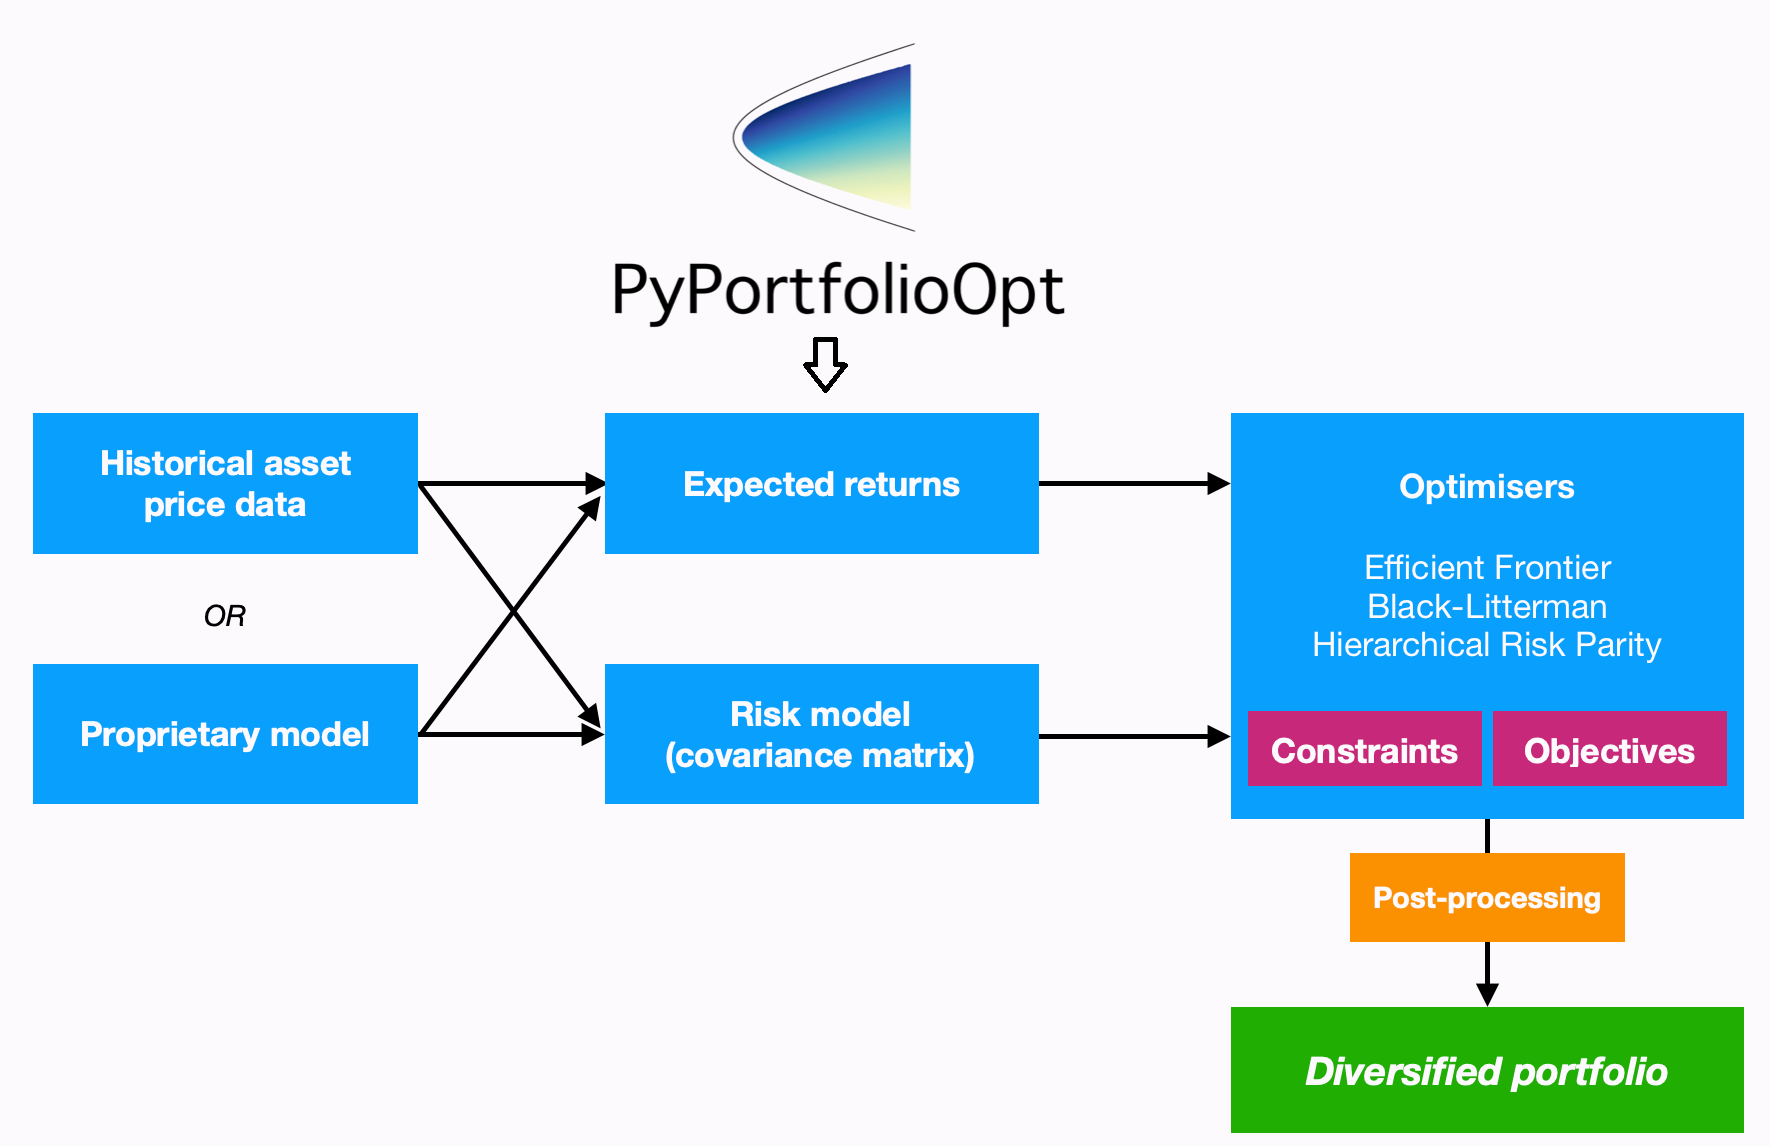
source:https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html


Available risk models in library are:        
                                                      
    sample_cov                               
    semicovariance
    exp_cov
    ledoit_wolf
    ledoit_wolf_constant_variance
    ledoit_wolf_single_factor
    ledoit_wolf_constant_correlation
    oracle_approximating


Available return Estimators in the Library are:

    mean historical return
    exponentially weighted mean historical return
    CAPM estimate of returns


***
Ledoit, O., & Wolf, M. (2003). Honey, I Shrunk the Sample Covariance Matrix The Journal of Portfolio Management, 30(4), 110–119. https://doi.org/10.3905/jpm.2004.110
***


In [1]:
import pypfopt as ppo
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
import numpy as np
import pandas as pd

In [2]:
def load_info(tickers):
    inf = [[0 for i in range(len(tickers))] for j in range(8)]
    for i in range(len(tickers)):
        info = yf.Ticker(tickers[i]).info
        inf[0][i] = info['longName']
        inf[1][i] = info['sector']
        inf[2][i] = info['marketCap']
        inf[3][i] = info['beta']
        inf[4][i] = info['returnOnAssets']
        inf[5][i] = info['returnOnEquity']
        inf[6][i] = info['enterpriseToRevenue']
        inf[7][i] = info['enterpriseToEbitda']
    inf_df = pd.DataFrame(data = [inf[0], inf[1], np.array(inf[2])/1000000000, inf[3], inf[4], inf[5], inf[6], inf[7]],
                         index = ['Name', 'Sector', 'Market Cap $B', 'Beta', 'ROA', 'ROE', 'EV/Revenue', 'EV/EBITDA'],
                         columns = tickers).T
    return inf, inf_df

def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(tickers))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        portfolio_return = np.sum(mean_returns*weights) 
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
        
    weight_df = pd.DataFrame(data = [weights_record[i] for i in range(len(weights_record))], columns = [i for i in tickers] )
    res_df = pd.DataFrame(data = [results[0], results[1], results[2]],
                  index = ['Expected Portfolio Volatility', 'Expected Portfolio Returns', 'Sharp Ratio']).T
    results_df = pd.DataFrame.join(res_df, weight_df)
    return results, weights_record, results_df


In [3]:
# First Trust Nasdaq Food & Beverage ETF
# tickers = ['BG','ADM','HSY','TSN','DAR','GIS','CAG','PEP','KDP','SJM','CTVA','K','MDLZ','KO','BGS']
# First Trust Dow Jones Internet Index Fund
# tickers = ['AMZN','FB','GOOGL','CRM','NFLX','PYPL','GOOG','CSCO','SNAP','SNOW','ABNB','ZM','WDAY','TWTR','EBAY']
# Vanguard Mid-Cap Growth ETF [,'MRVL','DLR','VEEV','APH','CDNS','FTNT','INFO','MCHP']
# tickers = ['IDXX','DOCU','CMG','DXCM','SNPS','MSCI','IQV']
# SPDR Portfolio S&P 500 High Dividend ETF
# tickers = ['BKR','CMA','VLO','MPC','OKE','KEY','WMB','MTB','PBCT','RF','HBAN','PSX','MET','SPG','USB']

tickers = ['NFLX','DOCU','TWTR','IDXX','HSY','PYPL']

In [4]:
data = yf.download(tickers = tickers, start = '2015-01-01', end = '2021-10-15')['Adj Close']
info, info_df = load_info(tickers)
info_df

[*********************100%***********************]  6 of 6 completed


,Name,Sector,Market Cap $B,Beta,ROA,ROE,EV/Revenue,EV/EBITDA
NFLX,"Netflix, Inc.",Communication Services,278.07862,0.713227,0.0972,0.37863,10.449,46.406
DOCU,"DocuSign, Inc.",Technology,51.239137,0.913813,-0.02915,-0.46166,28.6,-1775.375
TWTR,"Twitter, Inc.",Communication Services,50.088387,0.820634,0.01751,0.05001,10.739,59.953
IDXX,"IDEXX Laboratories, Inc.",Healthcare,54.035964,0.951322,0.24693,1.42552,17.993,56.896
HSY,The Hershey Company,Consumer Defensive,37.006844,0.373544,0.14352,0.713,4.729,17.492
PYPL,"PayPal Holdings, Inc.",Financial Services,315.319321,1.198412,0.03855,0.25235,13.11,61.081


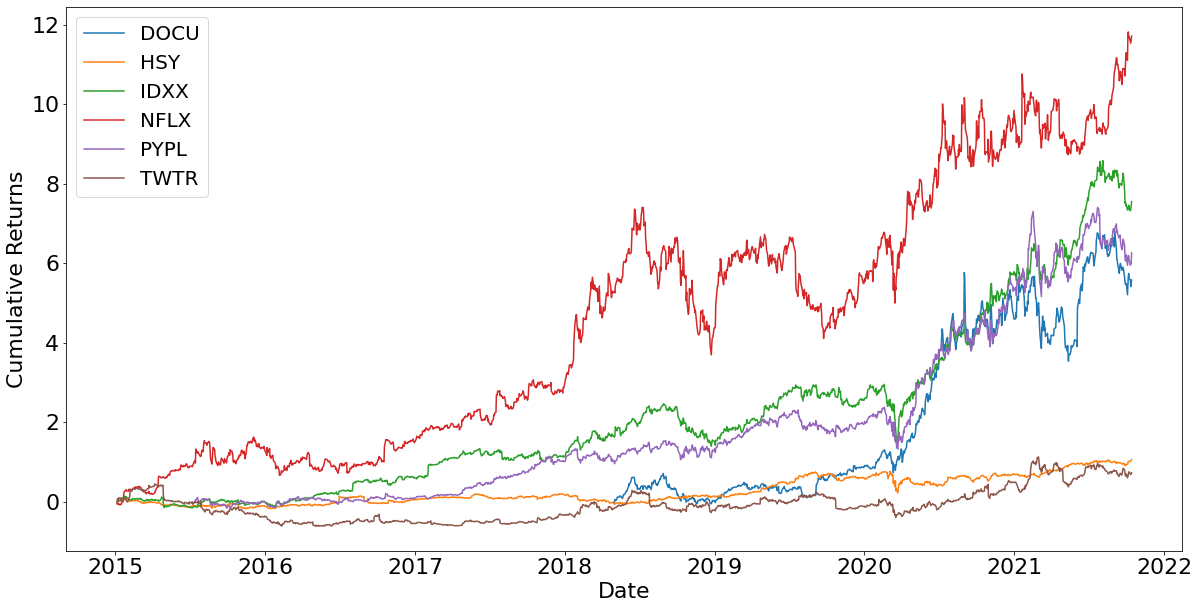

In [5]:
plt.figure(figsize=(20, 10))
rcParams.update({'font.size': 22})
plt.plot((1 + data.pct_change()).cumprod() - 1, label = data.columns)
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.legend(prop = {'size': 20})
plt.show()

In [6]:
mean_returns = ppo.expected_returns.capm_return(data)
cov_returns = ppo.risk_models.risk_matrix(data, method='ledoit_wolf')
cov_returns

,DOCU,HSY,IDXX,NFLX,PYPL,TWTR
DOCU,0.139794,0.002421,0.036101,0.042088,0.049621,0.044993
HSY,0.002421,0.053540,0.019470,0.015766,0.020398,0.016726
IDXX,0.036101,0.019470,0.092076,0.039210,0.047136,0.050137
NFLX,0.042088,0.015766,0.039210,0.171123,0.053424,0.061732
PYPL,0.049621,0.020398,0.047136,0.053424,0.109819,0.062771
TWTR,0.044993,0.016726,0.050137,0.061732,0.062771,0.267345


In [7]:
mean_returns

DOCU    0.573483
HSY     0.141580
IDXX    0.293450
NFLX    0.396794
PYPL    0.368204
TWTR    0.513980
Name: mkt, dtype: float64

In [8]:
results, weights_record, results_df = random_portfolios(100000, mean_returns, cov_returns, 0.03)
max_sharp_port = results_df.loc[results_df['Sharp Ratio'] == results_df['Sharp Ratio'].max()]
min_vol_port = results_df.loc[results_df['Expected Portfolio Volatility'] == results_df['Expected Portfolio Volatility'].min()]
min_var_loc = int(np.where(results == results[0].min())[1])
max_sharp_loc = int(np.where(results == results[2].max())[1])

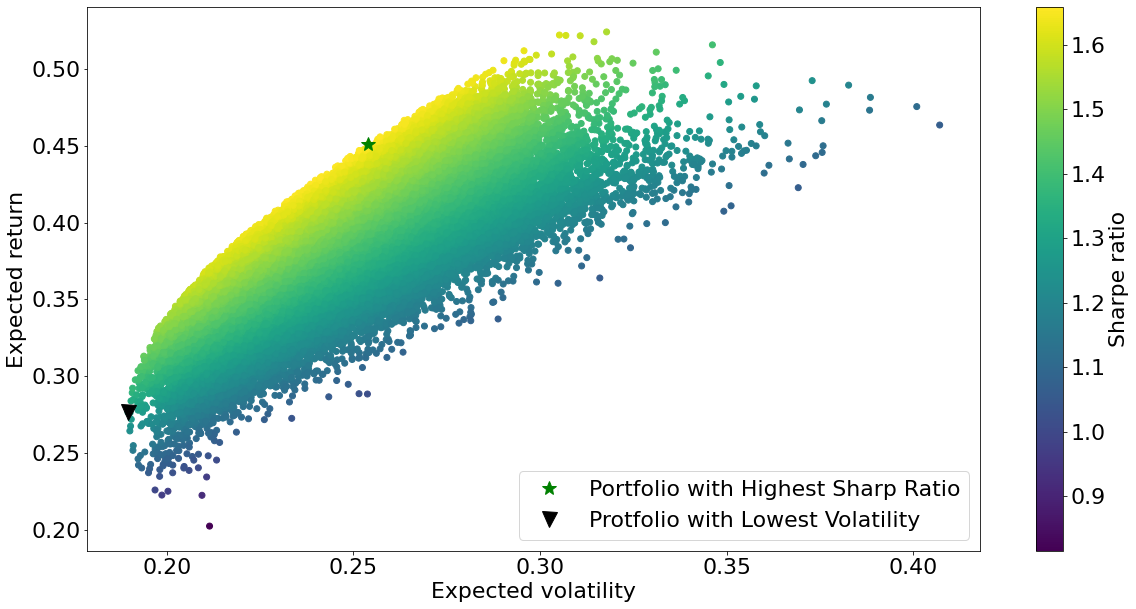

In [9]:
#Visualizing our results
plt.figure(figsize=(20, 10))
plt.scatter(x = results[0], y = results[1], c = results[2], marker='o')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio')
plt.plot(max_sharp_port['Expected Portfolio Volatility'],max_sharp_port['Expected Portfolio Returns'],
         'g*', markersize=15, label = 'Portfolio with Highest Sharp Ratio')
plt.plot(min_vol_port['Expected Portfolio Volatility'],min_vol_port['Expected Portfolio Returns'],
         'kv', markersize=15, label = 'Protfolio with Lowest Volatility')
plt.legend()
plt.show()

In [10]:
max_sharp_port.style.set_caption("Maximum Sharp Ratio Portfolio Summary").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'steelblue'),
        ('font-size', '16px')
    ]
}])

,Expected Portfolio Volatility,Expected Portfolio Returns,Sharp Ratio,NFLX,DOCU,TWTR,IDXX,HSY,PYPL
31649,0.254033,0.451300,1.658446,0.486000,0.159686,0.019785,0.107051,0.104434,0.123044


In [11]:
min_vol_port.style.set_caption("Minimum Volatility Portfolio Summary").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'steelblue'),
        ('font-size', '16px')
    ]
}])

,Expected Portfolio Volatility,Expected Portfolio Returns,Sharp Ratio,NFLX,DOCU,TWTR,IDXX,HSY,PYPL
50301,0.189584,0.276376,1.299559,0.169824,0.551671,0.142849,0.042448,0.039719,0.053490
